Hola **Elaine**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

##  Introduccion
El presente proyecto tiene como objetivo principal identificar los factores que contribuyen a la cancelación de clientes en la empresa de telecomunicaciones Interconnect, con el fin de desarrollar estrategias predictivas y preventivas que permitan mejorar la retención de usuarios. Utilizando un enfoque basado en datos, se analiza un conjunto de información detallada que incluye características demográficas, tipo de contrato, métodos de pago y servicios contratados por los clientes. A través de un análisis exploratorio inicial, se busca comprender los patrones y relaciones clave que influyen en la decisión de cancelar el servicio. Posteriormente, se emplearán técnicas de aprendizaje automático para construir un modelo predictivo capaz de identificar a los clientes con mayor probabilidad de cancelar.

## Importar las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [33]:
# Control de versiones
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

print("Versiones de las librerías:")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

Versiones de las librerías:
Pandas: 1.2.4
Matplotlib: 3.3.4
Seaborn: 0.11.1
Scikit-learn: 0.24.1


## Exploración inicial de los datos

In [2]:
# Rutas de los archivos en la plataforma
personal_path = "/datasets/final_provider/personal.csv"
contract_path = "/datasets/final_provider/contract.csv"
phone_path = "/datasets/final_provider/phone.csv"
internet_path = "/datasets/final_provider/internet.csv"

# Leer los datos
personal_df = pd.read_csv(personal_path)
contract_df = pd.read_csv(contract_path)
phone_df = pd.read_csv(phone_path)
internet_df = pd.read_csv(internet_path)

In [3]:
# Verificar valores nulos y estructura general de los datos
personal_nulls = personal_df.isnull().sum()
contract_nulls = contract_df.isnull().sum()
phone_nulls = phone_df.isnull().sum()
internet_nulls = internet_df.isnull().sum()

# Resumen de valores únicos para identificar posibles inconsistencias
personal_unique = personal_df.nunique()
contract_unique = contract_df.nunique()
phone_unique = phone_df.nunique()
internet_unique = internet_df.nunique()

# Generar un reporte inicial
report = {
    "Dataset": ["personal", "contract", "phone", "internet"],
    "Null Values": [
        personal_nulls.sum(),
        contract_nulls.sum(),
        phone_nulls.sum(),
        internet_nulls.sum(),],
    "Unique Values": [
        personal_unique.to_dict(),
        contract_unique.to_dict(),
        phone_unique.to_dict(),
        internet_unique.to_dict(),],}

# Crear un DataFrame del reporte
report_df = pd.DataFrame(report)

# Mostrar el reporte
print("Initial Data Quality Report:")
report_df

Initial Data Quality Report:


,Dataset,Null Values,Unique Values
0,personal,0,"{'customerID': 7043, 'gender': 2, 'SeniorCitiz..."
1,contract,0,"{'customerID': 7043, 'BeginDate': 77, 'EndDate..."
2,phone,0,"{'customerID': 6361, 'MultipleLines': 2}"
3,internet,0,"{'customerID': 5517, 'InternetService': 2, 'On..."


He generado un reporte inicial sobre la calidad de los datos para los cuatro conjuntos proporcionados. Esto incluye valores nulos y un resumen de las variables únicas para identificar inconsistencias.

In [4]:
# Limpieza de los datos
def data_cleaning(df, dataset_name):
    print(f"--- Dataset: {dataset_name} ---")
    # Valores nulos
    print("Valores nulos por columna:")
    print(df.isnull().sum())
    print("\n--- Valores únicos por columna ---")
    print(df.nunique())
    print("\nPrimeras filas del dataset:")
    print(df.head())
    print("\n")

# Aplicar la limpieza a cada dataset
data_cleaning(personal_df, "Personal")

--- Dataset: Personal ---
Valores nulos por columna:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

--- Valores únicos por columna ---
customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

Primeras filas del dataset:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No




In [5]:
data_cleaning(contract_df, "Contract")

--- Dataset: Contract ---
Valores nulos por columna:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

--- Valores únicos por columna ---
customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

Primeras filas del dataset:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0     

In [6]:
data_cleaning(phone_df, "Phone")

--- Dataset: Phone ---
Valores nulos por columna:
customerID       0
MultipleLines    0
dtype: int64

--- Valores únicos por columna ---
customerID       6361
MultipleLines       2
dtype: int64

Primeras filas del dataset:
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes




In [7]:
data_cleaning(internet_df, "Internet")

--- Dataset: Internet ---
Valores nulos por columna:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

--- Valores únicos por columna ---
customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

Primeras filas del dataset:
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSuppo

In [8]:
# Unificar los datos usando la columna customerID
merged_df = personal_df.merge(contract_df, on="customerID", how="inner")
merged_df = merged_df.merge(phone_df, on="customerID", how="left")
merged_df = merged_df.merge(internet_df, on="customerID", how="left")

In [9]:
# Resumen del conjunto de datos consolidado
print("Dataset Consolidado:")
merged_df.info()

Dataset Consolidado:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  551

In [10]:
merged_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance con la exploración inicial de los datos a utilizar, sin embargo, la limpieza no se ha llevado a cabo correctamente. Si revisas sigues teniendo valores nulos o ausentes, deberías manejarlos o explicar el porque es mejor dejarlos cómo nulos
</div>

Hasta aqui se ha ralizado una inspección individual de cada dataset, Verificando valores nulos, valores únicos, y una muestra inicial de datos. Unificación: Se han combinado todos los datasets en uno solo consolidado, usando customerID como clave principal y se ha realizado un resumen del mismo.

In [11]:
# Crear una columna 'Churn' basada en 'EndDate'
merged_df['Churn'] = merged_df['EndDate'].apply(lambda x: 1 if x != "No" else 0)

merged_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,...,29.85,NaN,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,...,1889.5,No,DSL,Yes,No,Yes,No,No,No,0
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,...,108.15,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),...,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,...,151.65,No,Fiber optic,No,No,No,No,No,No,1


Creamos la columna Churn que asigna 1 a los clientes que cancelaron y 0 a los que no.

In [12]:
# Verificar la distribución de la columna Churn
print("Distribución de Churn (Cancelación):")
print(merged_df['Churn'].value_counts())

Distribución de Churn (Cancelación):
0    5174
1    1869
Name: Churn, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Siempre hay que revisar el balance de los datos para saber si se debe aplicar alguna técnica para manejarlo
    
</div>

## 2  Análisis Exploratorio de Datos (EDA)

In [13]:
# Estadísticas descriptivas generales
print("Resumen Estadístico General:")
merged_df.describe()

Resumen Estadístico General:


,SeniorCitizen,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,0.265370
std,0.368612,30.090047,0.441561
min,0.000000,18.250000,0.000000
25%,0.000000,35.500000,0.000000
50%,0.000000,70.350000,0.000000
75%,0.000000,89.850000,1.000000
max,1.000000,118.750000,1.000000


### Visualizar la relación entre 'Churn' y otras variables relevantes

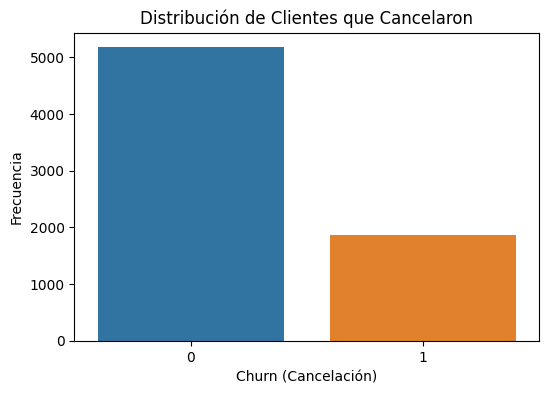

In [14]:
# Distribución de cancelaciones
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x="Churn")
plt.title("Distribución de Clientes que Cancelaron")
plt.xlabel("Churn (Cancelación)")
plt.ylabel("Frecuencia")
plt.show()

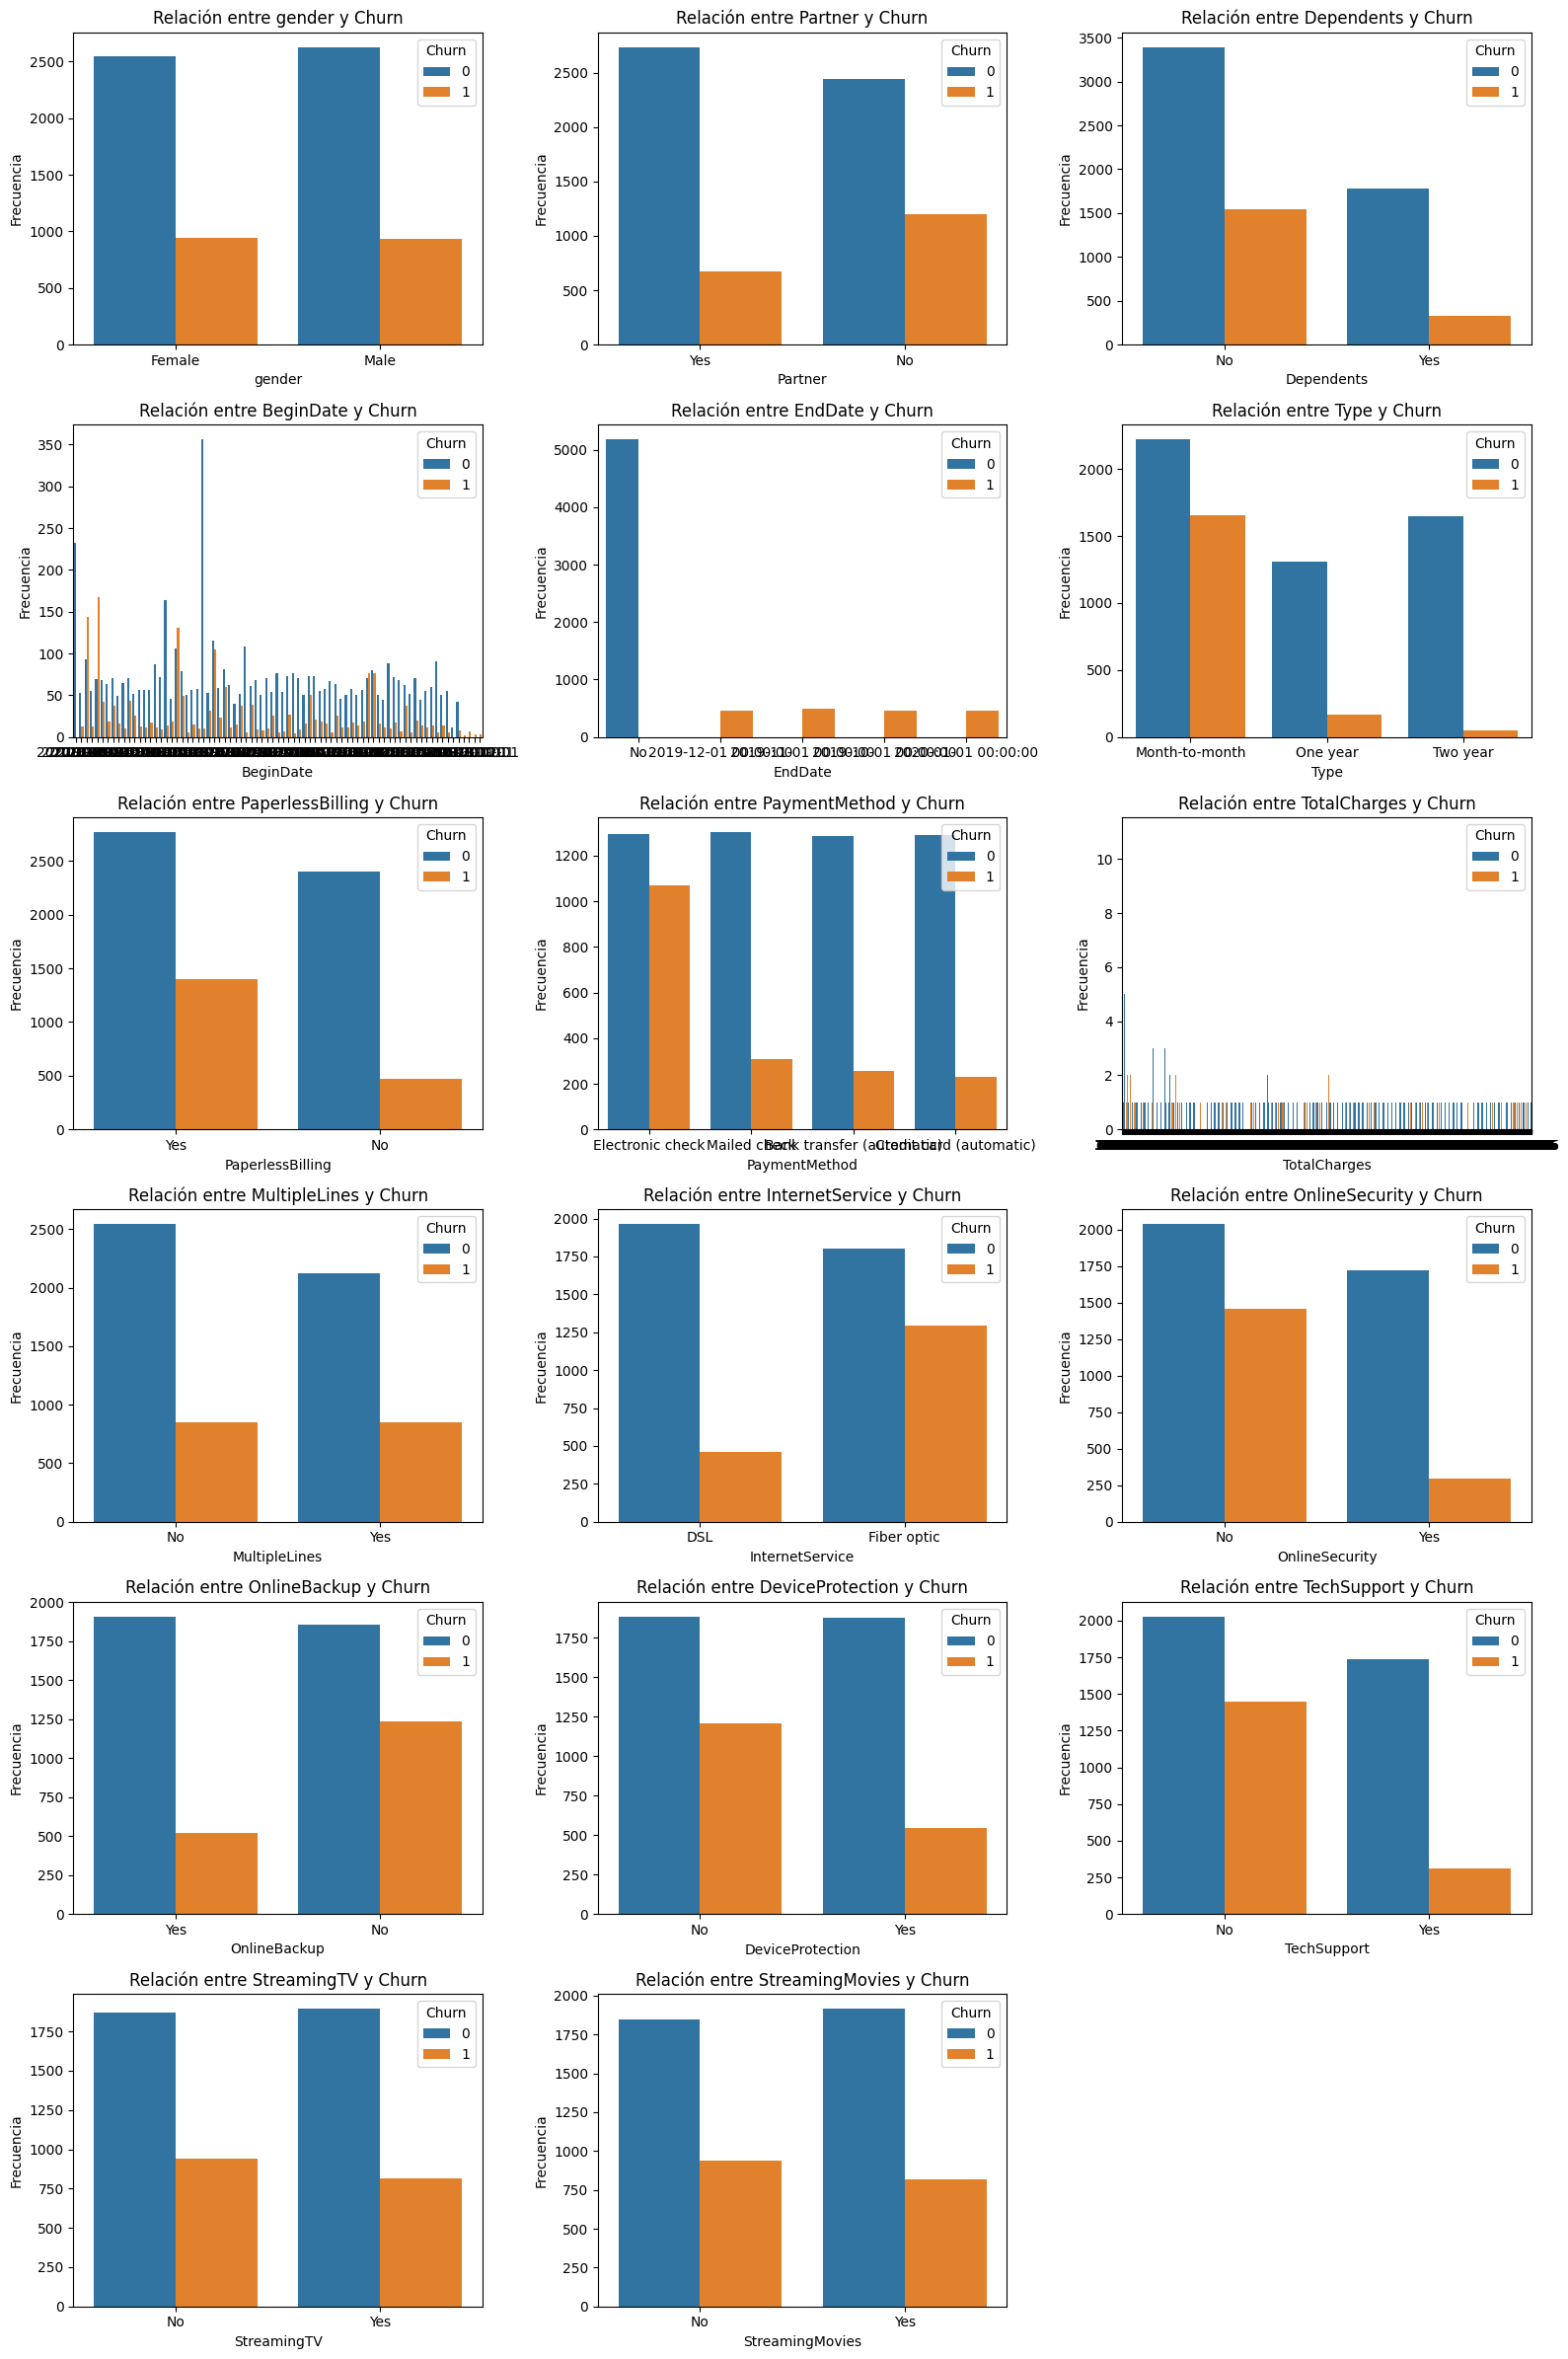

In [15]:
# Filtrar columnas categóricas relevantes (excluyendo customerID)
categorical_cols = [col for col in merged_df.select_dtypes(include=['object']).columns if col != "customerID"]

# Definir el tamaño de la cuadrícula
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Aplanar los ejes para fácil iteración

# Graficar cada variable categórica
for i, col in enumerate(categorical_cols):
    sns.countplot(data=merged_df, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Relación entre {col} y Churn")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].legend(title="Churn", loc="upper right")  
    
# Ocultar ejes sobrantes si hay menos gráficos que cuadrantes
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Ajustar espaciado
plt.tight_layout()
plt.show()

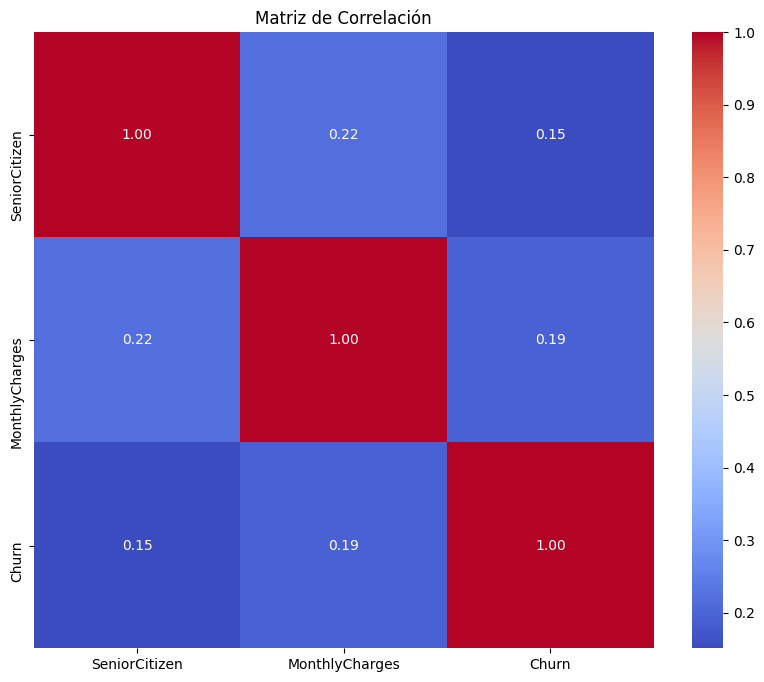

In [16]:
# Correlación entre variables numéricas
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Según los gráficos, los clientes que cancelan (Churn = 1) presentan las siguientes características:
Tienen mayor probabilidad de estar en contratos de "Month-to-month" en lugar de contratos a uno o dos años.
Prefieren métodos de pago como "Electronic check", los cuales están más asociados con tasas altas de cancelación.
Los clientes sin servicios adicionales como "OnlineSecurity" o "TechSupport" tienen mayores tasas de cancelación.
Los clientes que usan "Fiber optic" tienen una tasa de cancelación más alta en comparación con DSL.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, interpretaste muy bien los datos con las gráficas. Esto ayuda a entender mejor los posibles comportamientos de los modelos
</div>

## Entrenamiento y Evaluación del Modelo

In [17]:
# Usar Label Encoding para variables categóricas
categorical_cols = merged_df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    if col != "customerid":  # Excluir customerID
        le = LabelEncoder()
        merged_df[col] = le.fit_transform(merged_df[col])
        label_encoders[col] = le

In [18]:
merged_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,5375,0,0,1,0,75,4,0,1,2,...,2505,2,0,0,1,0,0,0,0,0
1,3962,1,0,0,0,42,4,1,0,3,...,1466,0,0,1,0,1,0,0,0,0
2,2564,1,0,0,0,72,2,0,1,3,...,157,0,0,1,1,0,0,0,0,1
3,5535,1,0,0,0,31,4,1,0,0,...,1400,2,0,1,0,1,1,0,0,0
4,6511,0,0,0,0,71,1,0,1,2,...,925,0,1,0,0,0,0,0,0,1


En este bloque se convirtieron las variables categóricas a valores numéricos utilizando, una técnica útil para preparar los datos categóricos para modelos de machine learning.

In [19]:
# Normalización de variables numéricas
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

In [20]:
# División del conjunto de datos

# Separar las características (X) y la variable objetivo (y)
X = merged_df.drop(columns=["Churn", "customerID", "BeginDate", "EndDate"])  # Eliminar Churn y customerID de las características
y = merged_df["Churn"]  # Variable objetivo

# Dividir datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaños de los conjuntos:")
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Validación:", X_valid.shape, y_valid.shape)
print("Prueba:", X_test.shape, y_test.shape)

Tamaños de los conjuntos:
Entrenamiento: (4930, 17) (4930,)
Validación: (1056, 17) (1056,)
Prueba: (1057, 17) (1057,)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, preparaste correctamente los datos para poder evaluar el desempeño de los modelos
</div>

In [21]:
X_train

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1695,0.990532,-0.439916,1.034530,1.529024,0.371271,0.829798,0.398558,0.197365,-0.011540,0.586128,-1.183234,-0.903589,0.284912,-0.998016,0.347362,0.238887,-1.078210
1095,0.990532,-0.439916,-0.966622,-0.654012,-0.828207,0.829798,0.398558,0.524739,1.463129,-0.938280,0.172250,-0.903589,-0.999747,-0.998016,-0.909172,0.238887,-1.078210
3889,0.990532,-0.439916,-0.966622,-0.654012,0.371271,-1.205113,-0.537747,-1.510962,-0.538397,-0.938280,1.527734,1.606361,1.569572,1.570134,1.603896,1.549232,1.547597
3667,-1.009559,2.273159,1.034530,1.529024,1.570749,0.829798,0.398558,1.056514,-0.718958,-0.938280,0.172250,-0.903589,-0.999747,0.286059,-0.909172,0.238887,0.234693
2902,-1.009559,2.273159,-0.966622,-0.654012,-0.828207,0.829798,0.398558,0.310367,0.302985,-0.938280,0.172250,0.351386,-0.999747,-0.998016,-0.909172,-1.071457,-1.078210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.990532,-0.439916,1.034530,-0.654012,-0.828207,0.829798,0.398558,1.004999,1.684991,-0.938280,0.172250,0.351386,-0.999747,-0.998016,-0.909172,0.238887,0.234693
5191,-1.009559,-0.439916,1.034530,1.529024,1.570749,0.829798,-0.537747,0.875378,-0.761847,0.586128,-1.183234,0.351386,0.284912,0.286059,0.347362,0.238887,0.234693
5226,0.990532,-0.439916,1.034530,1.529024,-0.828207,0.829798,0.398558,-1.449476,-0.317064,-0.938280,1.527734,1.606361,1.569572,1.570134,1.603896,1.549232,1.547597
5390,0.990532,2.273159,-0.966622,-0.654012,-0.828207,0.829798,0.398558,1.152899,-1.529099,0.586128,0.172250,-0.903589,-0.999747,0.286059,-0.909172,0.238887,0.234693


In [22]:
print(y_train.head())
print(y_valid.head())
print(y_test.head())

1695   -0.601023
1095   -0.601023
3889   -0.601023
3667   -0.601023
2902   -0.601023
Name: Churn, dtype: float64
5743   -0.601023
3207   -0.601023
2574    1.663829
6085    1.663829
676    -0.601023
Name: Churn, dtype: float64
23     -0.601023
3114   -0.601023
5525   -0.601023
437    -0.601023
3615    1.663829
Name: Churn, dtype: float64


In [23]:
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)
y_test = y_test.astype(int)  

In [24]:
print(y_train.unique()) 

[0 1]


Aqui validamos que los valores de la columna objetivo quedaron como flotantes, por lo que se procedio a convertirlos en enteros para el correcto funcionamiento del modelo.

In [25]:
# Calcular pesos basados en la columna y_train
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

Se usa sample_weights como parámetro para el balanceo de las clases.

In [26]:
# Crear una función para entrenar, ajustar y evaluar modelos
def train_and_evaluate_model_with_gridsearch(model, param_grid, model_name):
    print(f"\n{'='*40}\nEntrenando modelo: {model_name}\n{'='*40}")

    # GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train, sample_weight=sample_weights)

    print(f"\nMejores Hiperparámetros para {model_name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Evaluación en el conjunto de validación
    print(f"\nEvaluación en el conjunto de validación: {model_name}")
    y_valid_pred = best_model.predict(X_valid)
    y_valid_proba = best_model.predict_proba(X_valid)[:, 1]  
    print(classification_report(y_valid, y_valid_pred))
    print("Accuracy en validación:", accuracy_score(y_valid, y_valid_pred))
    print("ROC-AUC en validación:", roc_auc_score(y_valid, y_valid_proba))

    # Matriz de confusión para el conjunto de validación
    print("Matriz de confusión (Validación):")
    print(confusion_matrix(y_valid, y_valid_pred))

    # Curva ROC para validación
    fpr, tpr, _ = roc_curve(y_valid, y_valid_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (Validation) - {model_name}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Validation) - {model_name}")
    plt.legend()
    plt.show()

    # Evaluación en el conjunto de prueba
    print(f"\nEvaluación en el conjunto de prueba: {model_name}")
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]  
    print(classification_report(y_test, y_test_pred))
    print("Accuracy en prueba:", accuracy_score(y_test, y_test_pred))
    print("ROC-AUC en prueba:", roc_auc_score(y_test, y_test_proba))

    # Matriz de confusión para el conjunto de prueba
    print("Matriz de confusión (Prueba):")
    print(confusion_matrix(y_test, y_test_pred))

    # Curva ROC para prueba
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (Test) - {model_name}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Test) - {model_name}")
    plt.legend()
    plt.show()


Entrenando modelo: Logistic Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Mejores Hiperparámetros para Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}

Evaluación en el conjunto de validación: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       778
           1       0.50      0.83      0.62       278

    accuracy                           0.73      1056
   macro avg       0.71      0.77      0.71      1056
weighted avg       0.81      0.73      0.75      1056

Accuracy en validación: 0.7339015151515151
ROC-AUC en validación: 0.8418653252205434
Matriz de confusión (Validación):
[[543 235]
 [ 46 232]]


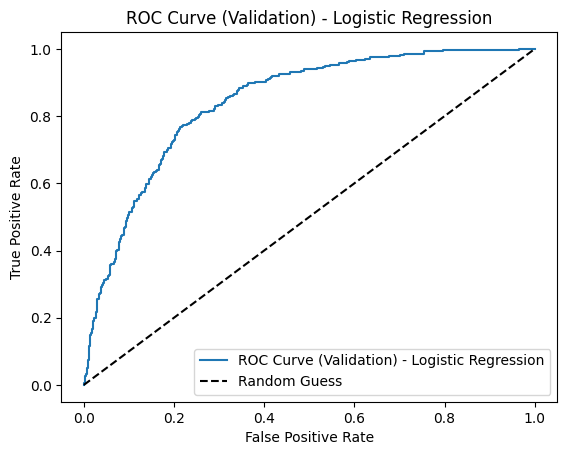


Evaluación en el conjunto de prueba: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       761
           1       0.51      0.83      0.63       296

    accuracy                           0.73      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.80      0.73      0.74      1057

Accuracy en prueba: 0.727530747398297
ROC-AUC en prueba: 0.8334184217068579
Matriz de confusión (Prueba):
[[524 237]
 [ 51 245]]


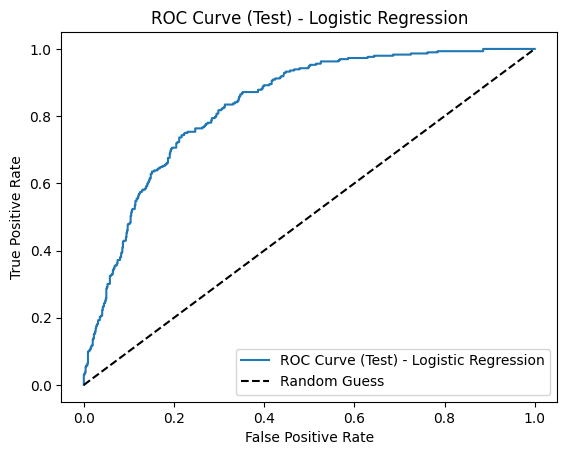

In [27]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
train_and_evaluate_model_with_gridsearch(logistic_model, logistic_param_grid, "Logistic Regression")


Entrenando modelo: Random Forest
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Mejores Hiperparámetros para Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

Evaluación en el conjunto de validación: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       778
           1       0.54      0.73      0.62       278

    accuracy                           0.77      1056
   macro avg       0.72      0.76      0.73      1056
weighted avg       0.80      0.77      0.78      1056

Accuracy en validación: 0.7679924242424242
ROC-AUC en validación: 0.8461004974940355
Matriz de confusión (Validación):
[[608 170]
 [ 75 203]]


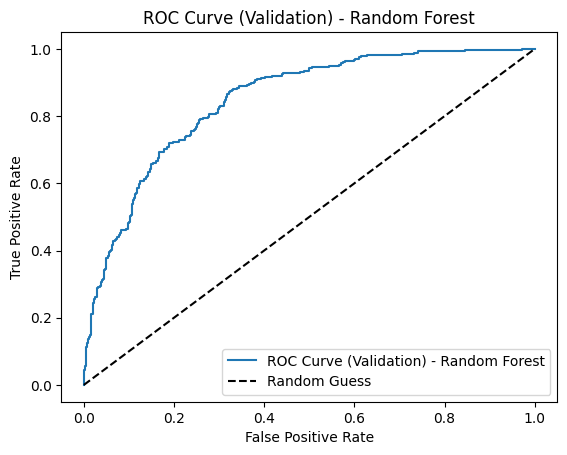


Evaluación en el conjunto de prueba: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       761
           1       0.56      0.73      0.63       296

    accuracy                           0.76      1057
   macro avg       0.72      0.75      0.73      1057
weighted avg       0.79      0.76      0.77      1057

Accuracy en prueba: 0.7615894039735099
ROC-AUC en prueba: 0.8364416486131335
Matriz de confusión (Prueba):
[[590 171]
 [ 81 215]]


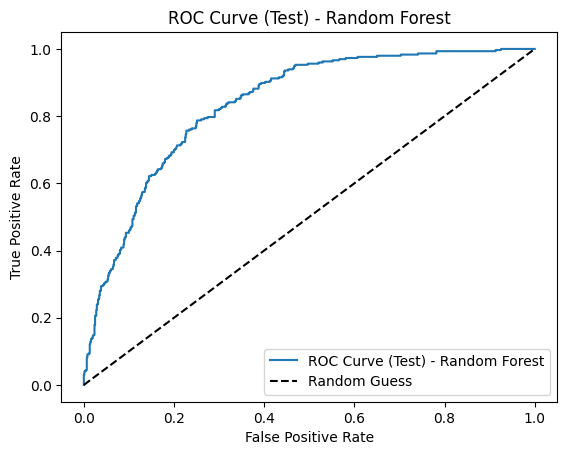

In [28]:
# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
train_and_evaluate_model_with_gridsearch(random_forest_model, random_forest_param_grid, "Random Forest")


Entrenando modelo: Gradient Boosting
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Mejores Hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Evaluación en el conjunto de validación: Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       778
           1       0.50      0.83      0.62       278

    accuracy                           0.74      1056
   macro avg       0.71      0.77      0.71      1056
weighted avg       0.81      0.74      0.75      1056

Accuracy en validación: 0.7386363636363636
ROC-AUC en validación: 0.8472402026964547
Matriz de confusión (Validación):
[[550 228]
 [ 48 230]]


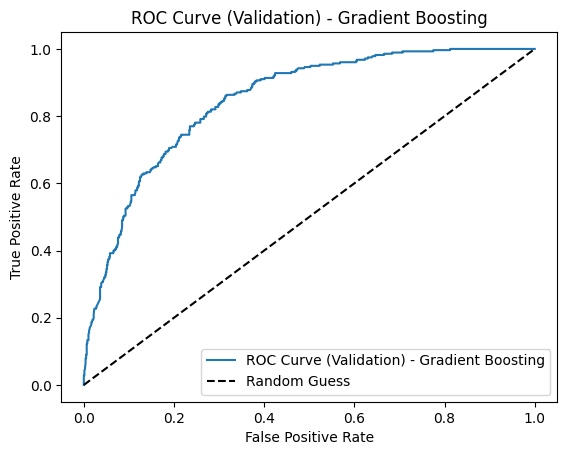


Evaluación en el conjunto de prueba: Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.71      0.79       761
           1       0.52      0.81      0.63       296

    accuracy                           0.74      1057
   macro avg       0.71      0.76      0.71      1057
weighted avg       0.80      0.74      0.75      1057

Accuracy en prueba: 0.7350993377483444
ROC-AUC en prueba: 0.8373761409241041
Matriz de confusión (Prueba):
[[537 224]
 [ 56 240]]


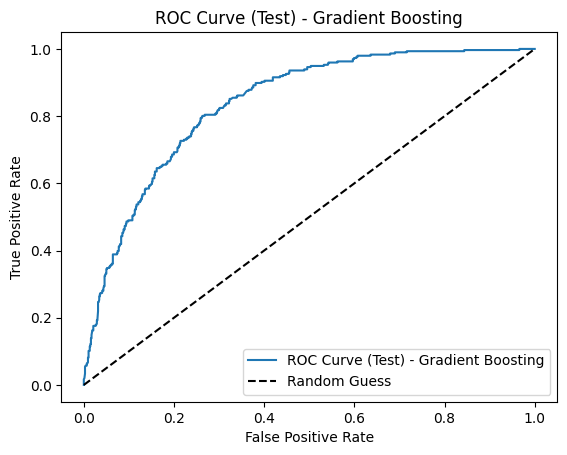

In [29]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
train_and_evaluate_model_with_gridsearch(gradient_boosting_model, gradient_boosting_param_grid, "Gradient Boosting")

## Conclusion

Tras analizar las métricas obtenidas para los diferentes modelos (Regresión Logística, Random Forest y Gradient Boosting), las principales conclusiones son las siguientes:

Regresión Logística:

En validación:
AUC-ROC: 0.8418.
Accuracy: 0.7339.
En prueba:
AUC-ROC: 0.8334.
Accuracy: 0.7275.
En general muestra un desempeño balanceado.

Random Forest:

En validación:
AUC-ROC: 0.8461.
Accuracy: 0.7679.
En prueba:
AUC-ROC: 0.8364.
Accuracy: 0.7615.
Modelo robusto con una mejora en AUC-ROC y accuracy respecto a la Regresión Logística, especialmente en la validación.

Gradient Boosting:

En validación:
AUC-ROC: 0.8472.
Accuracy: 0.7386.
En prueba:
AUC-ROC: 0.8373.
Accuracy: 0.7350.
Similar al Random Forest, pero con un desempeño apenas inferior en accuracy y ligeramente superior en AUC-ROC en validación y prueba.

Recomendación:
Modelo recomendado: Random Forest.

Proporciona un buen balance entre precisión y sensibilidad, con una alta métrica de AUC-ROC que lo posiciona como el más confiable para la tarea específica de clasificación. Además, tiene una estabilidad notable entre los conjuntos de validación y prueba, lo que indica buena generalización.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con tu proyecto Elaine! 
    
Realizaste una muy buena exploración de tus datos y planteaste comentarios acertados de los resultados, las métricas utilizadas para tus modelos son las adecuadas considerando el problema de clases desbalanceadas que tenías en tu variable objetivo. Debo destacar la presentación de los resultados de tus modelos, es súper clara e intuitiva.
    
Me gustaría dejarte algunas recomendaciones para que resaltes tu perfil profesional en el mundo laboral:
    
- **Exponer los modelos:** Puedes agregar más valor a tu perfil profesional exponiendo los modelos para que puedan ser utilizados en algún demo, esto puedes hacerlo con streamlit y en render.com cómo lo hiciste en un sprint anterior. Pero si quieres ir más allá también podrías investigar y hacerlo utilizando el framework de FastAPI.
- **Herramientas cloud:** Para demostrar un perfil más completo, también podrías utilizar algún servicio cloud cómo AWS y tratar de subir tus modelos entrenados ahí. No tienes que hacerlo a manera de experto, pero siempre es un plus tener conocimiento de estas herramientas.
- **Continúa aprendiendo y practicando:** La práctica hace al maestro, mientras más practiques más errores podrás solucionar y estarás más listo para afrontar problemas reales en un entorno laboral.
    
Saludos y felicidades!
</div>